In [1]:
# %pip install numpy tifffile matplotlib scikit-image scipy

In [52]:
from tqdm import tqdm
import numpy as np
import tifffile
import matplotlib.pyplot as plt
from skimage.registration import phase_cross_correlation
from scipy.ndimage import shift

In [53]:
import owncloud
import os

if not os.path.exists('data'):
    print('Creating directory for data')
    os.mkdir('data')

if not os.path.exists('data/data.tif'):
    oc = owncloud.Client.from_public_link('https://uni-bonn.sciebo.de/s/bFDLSfaxRqKlqT7')
    oc.get_file('/', 'data/data.tif');

In [54]:
movie = tifffile.imread('data/data.tif')
movie.shape

(3000, 170, 170)

#### Visuzling Frame Difference

array([1., 0.], dtype=float32)

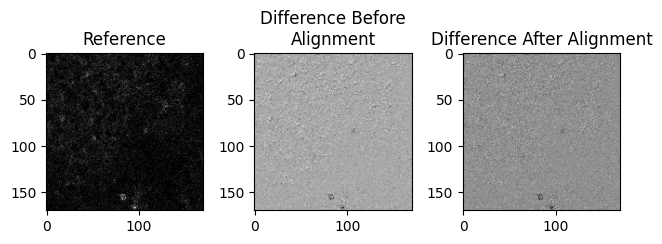

In [55]:
ref_frame = movie[0]
frame = movie[-1]
shift_val, _, _ = phase_cross_correlation(ref_frame, frame)  
aligned = shift(frame, shift=shift_val)  

plt.subplot(1, 3, 1)
plt.imshow(ref_frame, cmap='gray')  
plt.title("Reference")


plt.subplot(1, 3, 2)
plt.imshow(frame - ref_frame, cmap='gray')  
plt.title("Difference Before\nAlignment")

plt.subplot(1, 3, 3)
plt.imshow(aligned - ref_frame, cmap='gray')  
plt.title("Difference After Alignment")

plt.tight_layout()
shift_val


### Visualizing Shift Amount for Each Frame

100%|██████████| 3000/3000 [00:08<00:00, 357.15it/s]


Text(0.5, 0, 'Y Motion')

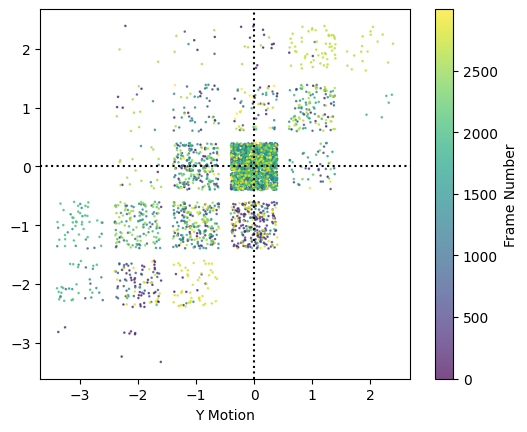

In [18]:
ref_frame = movie[1000:1200].max(axis=0)
shifts = np.array([phase_cross_correlation(ref_frame, frame)[0] for frame in tqdm(movie)])

plt.scatter(
    shifts[:, 1] + np.random.uniform(-.4, .4, size=len(shifts)),
    shifts[:, 0] + np.random.uniform(-.4, .4, size=len(shifts)), 
    c=np.arange(len(shifts)),
    s=.7,
    alpha=.7
);
plt.colorbar(label='Frame Number');
plt.axhline(0, color='black', linestyle='dotted')
plt.axvline(0, color='black', linestyle='dotted')
plt.gca().set_box_aspect(1)
plt.xlabel('X Motion')
plt.xlabel('Y Motion')

### Visualize Data Loss with Motion

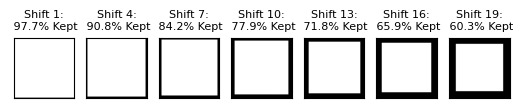

In [ ]:
n_plots = 7
for el in range(n_plots):
    shift_val = el * 3 + 1
    ex = np.zeros_like(movie[0])
    ex[shift_val:-shift_val, shift_val:-shift_val] = 1

    plt.subplot(1, n_plots, el + 1)
    plt.imshow(ex, cmap='gray')
    plt.title(f"Shift {shift_val}:\n {ex.mean():.1%} Kept", fontdict={'size': 8})
    plt.gca().xaxis.set_visible(False)
    plt.gca().yaxis.set_visible(False)